In [3]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import prospect.io.read_results as pread
import numpy as np
import sys
import glob, os

#import caesar

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/anaconda3/lib/python3.6/site-packages/t

In [2]:
"""
Sys args:

1. Intrinsic files (via caesar)
2. Derived files (.h5 prospector output)
"""

'\nSys args:\n\n1. Intrinsic files (.npz powderday output)\n2. Derived files (.h5 prospector output)\n'

In [53]:
def get_best(res, **kwargs):
    """Get the maximum a posteriori parameters.
    From prospect.utils.plotting
    """
    imax = np.argmax(res['lnprobability'])
    # there must be a more elegant way to deal with differnt shapes
    try:
        i, j = np.unravel_index(imax, res['lnprobability'].shape)
        theta_best = res['chain'][i, j, :].copy()
    except(ValueError):
        theta_best = res['chain'][imax, :].copy()

    theta_names = res.get('theta_labels', res['theta_labels'])
    return theta_names, theta_best

In [54]:
#Get intrinsic SFH from caesar - load snapshot, get sfr for each galaxy





In [55]:
#Get derived from prospect output 

#prosp_output = sys.argv[2]

res, obs, mod = pread.results_from('/Users/sidneylower/Documents/fsps_test/prospector_tests/fsps_const_test_1555677834_mcmc.h5')

#Fancy footwork to get sfr from non parametric...parameters


In [60]:
thetas, theta_best = get_best(res)
sfr_bins = theta_best[2:5]
time_bins = next(item for item in res['model_params'] if item["name"] == "agebins")['init']
time_bins_unraveled = list(set(np.ravel(time_bins)))
time_in_each_bin = [y-x for x, y in zip(test, test[1:])] 
logmass = theta_best[1]



stellar_mass = 10**logmass
frac_sfr_bins = []
for i in np.arange(len(sfr_bins)):
    frac_sfr_bins.append((stellar_mass * (10**sfr_bins[i])) / (time_in_each_bin[i] * 1.0e9))
    


In [61]:
frac_sfr_bins

[1.8504121593776997, 24.28613129094062, 6.863371823694034]

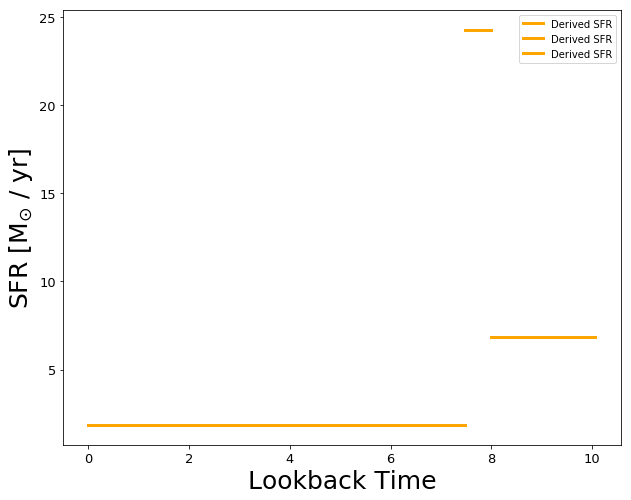

In [72]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.tick_params(axis='both', which='minor', labelsize=10)

for i in range(len(frac_sfr_bins)):
    plt.plot([time_bins[i][0], time_bins[i][1]], [frac_sfr_bins[i], frac_sfr_bins[i]], color='orange', lw=3, label='Derived SFR')

plt.ylabel('SFR [M$_{\odot}$ / yr]', fontsize=25)
plt.xlabel('Lookback Time', fontsize=25)

plt.legend()

[0.0, 7.4772]